In [4]:
from typing import List, TypedDict
from langgraph.graph import StateGraph,START,END
import random

In [5]:
class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts : int
    lower_bound: int
    upper_bound: int
    number_to_guess: int
    communicate: str

In [13]:
def guess_number(state: AgentState) -> AgentState:
    guess_number = (state["lower_bound"] + state["upper_bound"]) // 2
    state["guesses"].append(guess_number)
    return state
def hint(state: AgentState) -> AgentState:
    last_guess = state["guesses"][-1]
    if last_guess < state["number_to_guess"]:
        communicate = "higher"
        attempts = state["attempts"] + 1
        return communicate
    elif last_guess > state["number_to_guess"]:
        communicate = "lower"
        attempts = state["attempts"] + 1
        return communicate
    else:
        communicate = "correct"
        attempts = state["attempts"] + 1
        return communicate

def router(state: AgentState) -> AgentState:
    if state['communicate'] == "correct":
        return "exit"
    else:
        return "loop"
       
    


 

In [29]:
graph = StateGraph(AgentState)

graph.add_node("guess_number", guess_number)
graph.add_node("hint", hint)
graph.add_edge("guess_number", "hint")

graph.add_conditional_edges(
    "hint",
    router,
    {
        "continue": "guess_number",

    }
)
graph.set_entry_point("guess_number")
app = graph.compile()




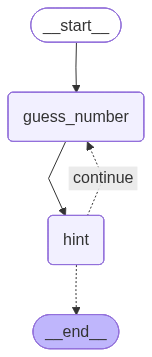

In [30]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))